In [12]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


### Adjust Settings

In [13]:
frameWidth = 1920
frameHeight = 1088
root_dir = "./"
thresholdValue = 200


In [14]:

file_set = set()
file_list = []
# file_filter_set produces the files that detects movement.
file_filter_set = set()

for dir_, _, files in os.walk(root_dir):
    for file_name in files:
        rel_dir = os.path.relpath(dir_, root_dir)
        rel_file = os.path.join(rel_dir, file_name)
        if file_name.split('.')[-1] == "mp4":
            file_set.add(rel_file)
            file_list.append(root_dir+rel_file)

In [15]:
file_filter_set = set()
for f in file_list:
    print("Processing {0}".format(f))
    cap = cv2.VideoCapture(f)
    firstFrame = ""
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = gray[100::,0::]  #Skip top 100 rows to avoid displaying time
            # gray = cv2.GaussianBlur(gray, (21, 21), 0)
            if firstFrame == "":
                firstFrame = gray
            frameDelta = cv2.absdiff(firstFrame, gray)
            thresh = cv2.threshold(frameDelta, thresholdValue, 255, cv2.THRESH_BINARY)[1]
            if np.amax(thresh) > thresholdValue :
                file_filter_set.add(f)
        else: 
            break
        firstFrame = gray
    cap.release()
print("Completed")

Completed


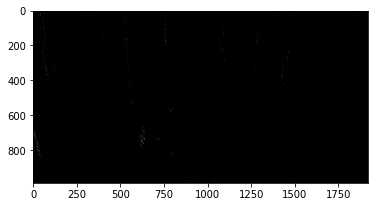

In [16]:
plt.imshow(frameDelta,"gray", vmin=0, vmax=100)

## Showing the files with motion detected in them

In [17]:
file_filter_set

set()